In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(10)


In [2]:
def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0]-pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
            
    return np.array(inputs), np.array(labels).reshape(n, 1)


In [3]:
def generate_XOR_easy():
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i ==0.5:
            continue
            
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)


In [20]:
def show_result(x, y, pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground turth', fontsize=18)
    
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1,2,2)
    plt.title('Predict result', fontsize=18)
    
    MID = max(pred_y) * 0.5 + min(pred_y) * 0.5
    for i in range(len(pred_y)):
        if pred_y[i]<MID:
            plt.plot(x[i][0],x[i][1],'ro')
        else:
            plt.plot(x[i][0],x[i][1],'bo')

    # accuracy
    correct = 0
    for i in range(len(pred_y)):
        if y[i]==0 and pred_y[i]<MID : correct +=1
        if y[i]==1 and pred_y[i]>=MID : correct +=1

    accuracy = float(1.0 * correct/len(pred_y))
    print('accuracy : ',accuracy)
    plt.show()

    
#     for i in range(x.shape[0]):
#         if pred_y[i] == 0:
#             plt.plot(x[i][0], x[i][1], 'ro')
#         else:
#             plt.plot(x[i][0], x[i][1], 'bo')
            
#     plt.show

            

In [5]:
# Initialize a network
def initialize_network(num_of_nodes, layers):
    w = list([])    
    
    for i in range(layers+1): 
        layer_list = []
        
        for j in range(num_of_nodes[i]):
            tmp_list = []
            
            for k in range(num_of_nodes[i+1]):
                tmp_list.append( np.random.uniform(-1,1) ) 
            layer_list.append(tmp_list)
            
        w.append(np.array(layer_list,dtype=np.float32))
    
    return w

In [15]:
def init_parameters_zeros(num_of_nodes):
    layers = len(num_of_nodes)-2
    W = list([])
    for i in range(layers+1):
        tmp_tmp_list = []
        for j in range(num_of_nodes[i]):
            tmp_list = []
            for k in range(num_of_nodes[i+1]):
                tmp_list.append( 0 )
            tmp_tmp_list.append(tmp_list)
        W.append(np.array(tmp_tmp_list,dtype=np.float32))
    return W

# Calculate neuron activation for an input
def activate(w, inputs):
    z = 0
    for i in range(len(weights)-1):
        z += w[i] * inputs[i]
    return z
 
# Transfer neuron activation
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

# Calculate the derivative of an neuron output
def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)
 
# Forward propagate input to a network output
def forward_propagate(w, x):
    A = list([])
    inputs = x
    
    for layer_w in w:
        new_inputs = []
        A.append(sigmoid(np.dot(inputs, layer_w)))
        inputs = A[-1]
        
    return A, inputs
 
# Backpropagate error and store in neurons
def backward_propagate_error(W, A, pred_y, x, y, num_of_nodes, layers):  
    dW = init_parameters_zeros(num_of_nodes)
    dZ = list([])

    for k in range(layers,-1,-1):
        if k == layers :
            tmp_dZlist = []
            for i in range(len(y)):
                tmp_dZlist.append((y[i]-pred_y[i])*derivative_sigmoid(A[layers][i]))
            dZ.insert(0,np.array(tmp_dZlist,dtype=np.float32))
        else :
            tmp_dZlist = list([])
            for i in range(len(A[k])):
                dZtmp = 0
                for j in range(len(dZ[0])):
                    dZtmp += dZ[0][j] * W[k+1][i][j]
                dZtmp = dZtmp*derivative_sigmoid(A[k][i])
                tmp_dZlist.append(dZtmp)
            dZ.insert(0,np.array(tmp_dZlist,dtype=np.float32))

    for i in range(layers+1):
        for j in range(len(W[i])):
            for k in range(len(W[i][j])):
                if not i==0:
                    dW[i][j][k] = dZ[i-1][j] * dZ[i][k]
                else:
                    dW[i][j][k] = x[j] * dZ[i][k]
    return dW

# Update network weights with error
def update_weights(W, dW, num_of_nodes, layers, lr):
    new_W = init_parameters_zeros(num_of_nodes)
    for i in range(layers+1):
        for j in range(len(W[i])):
            for k in range(len(W[i][j])):
                new_W[i][j][k] = W[i][j][k] + lr * dW[i][j][k]
    return new_W
 
# Train a network for a fixed number of epochs
def train_network(x, y, l_rate, n_epoch, n_outputs, num_of_nodes, layers):
    w = initialize_network(num_of_nodes, layers)
    #print(w)
    loss_list = []
    
    for epoch in range(n_epoch):
        pred_y_list = []
        
        for i in range(len(x)):
            A, output = forward_propagate(w, x[i])
            pred_y_list.append(output)
            error = abs(y[i]-output)
            #delta = backward_propagate_error(w, y[i], output, A)
            delta = backward_propagate_error(w, A, output, x[i], y[i], num_of_nodes, layers)
            w = update_weights(w, delta, num_of_nodes, layers, l_rate)
            
        loss_list.append(error)
        
        if epoch % 500 == 0:
            print('epoch %4d     loss : %.8f' % (epoch, error))
            
    plt.plot(loss_list, marker="s")
    plt.title('Learning curve')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    return pred_y_list

# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    #print(outputs)
    return outputs

In [16]:
x, y = generate_linear(n=100)
#x, y = generate_XOR_easy()

In [17]:
n_inputs = len(x[0])
n_outputs = len(y[0])
n_hidden = 3
layers = 2

num_of_nodes = [n_inputs, n_outputs]

for i in range(layers) : 
    num_of_nodes.insert(1, n_hidden)

# w = initialize_network(num_of_nodes, layers)
# print(w)

epoch    0    loss : 0.512
epoch  500    loss : 0.485
epoch 1000    loss : 0.018
epoch 1500    loss : 0.001
epoch 2000    loss : 0.000
epoch 2500    loss : 0.000
epoch 3000    loss : 0.000
epoch 3500    loss : 0.000
epoch 4000    loss : 0.000
epoch 4500    loss : 0.000


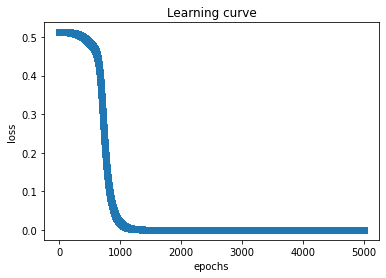

In [27]:
l_rate = 0.01
n_epoch = 5000

pre_y = train_network(x, y, l_rate, n_epoch, n_outputs, num_of_nodes, layers)
#print(network)

accuracy :  0.97


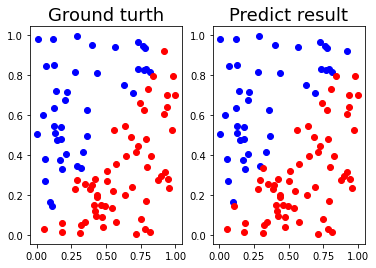

In [28]:
show_result(x, y, pre_y)

In [25]:
for i in range(len(pre_y)):
    print('%.8f' %pre_y[i][0])

0.00018310
0.91143625
0.99999365
0.00017785
0.99978562
0.00019394
0.00017742
0.00019064
0.99999346
0.99999348
0.99999160
0.00019394
0.99999263
0.00018420
0.00019081
0.99999299
0.99999245
0.99999361
0.99999186
0.99999361
0.00522310
0.00017406
0.99999310
0.00019270
0.00023235
0.99897548
0.00017732
0.99999339
0.00017469
0.00017909
0.00018496
0.99999361
0.99999172
0.00021621
0.99999349
0.99999363
0.99999360
0.00017361
0.99999088
0.00017630
0.00025855
0.00252289
0.99999358
0.99999112
0.97290079
0.99999367
0.00018183
0.00018238
0.00017464
0.00018569
0.00018838
0.00023230
0.00017842
0.00017687
0.00019447
0.00018060
0.99999294
0.00020150
0.00017416
0.99999365
0.00063081
0.00018213
0.00019839
0.00018408
0.99999322
0.00018276
0.00018714
0.99999306
0.99999344
0.00024565
0.00021670
0.99996302
0.99999352
0.00021730
0.99999344
0.00018294
0.99999363
0.99999361
0.00020608
0.00017670
0.00017428
0.00017459
0.99999367
0.00017462
0.00018913
0.99999068
0.00019422
0.00017384
0.00091750
0.99999355
0.00018651